In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import heapq

In [2]:
beta  = np.loadtxt('photon_index1000',usecols = (0,)) 
beta1 = np.loadtxt('photon_index1000',usecols = (1,))
beta2 = np.loadtxt('photon_index1000',usecols = (2,))

print(np.average(beta),(np.average(beta1) + np.average(beta2))*0.5)
print(np.std(beta)*np.sqrt(beta.size/(beta.size - 2)))

en_flux  = np.loadtxt('eneflux1000',usecols = (0,))
en_flux1 = np.loadtxt('eneflux1000',usecols = (1,))
en_flux2 = np.loadtxt('eneflux1000',usecols = (2,))

1.213585698135636 1.2137176176738889
0.023588555155413745


In [3]:
N_ph = np.histogram(beta,bins = 50)
N_ph1 = np.histogram(beta1,bins = 50)
N_ph2 = np.histogram(beta2,bins = 50)

ph_values = []
ph_values1 = []
ph_values2 = []


for i in range(N_ph[0].size):
    ph_values.append(0.5*(N_ph[1][i] + N_ph[1][i+1]))
    ph_values1.append(0.5*(N_ph1[1][i] + N_ph1[1][i+1]))
    ph_values2.append(0.5*(N_ph2[1][i] + N_ph2[1][i+1]))
    

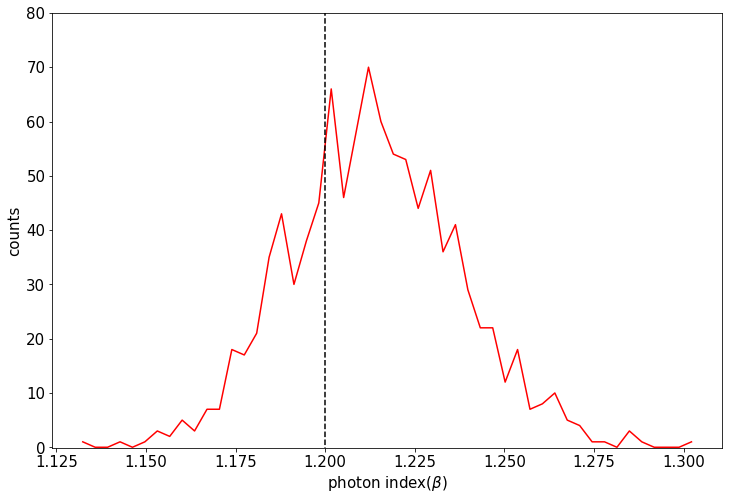

In [4]:
%matplotlib inline
plt.figure(figsize = (12,8))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(r'photon index($\beta$)',fontsize = 15)
plt.ylabel(r'counts',fontsize = 15)
#plt.plot(ph_values,N_ph[0],'ko')
plt.plot(ph_values,N_ph[0],color = 'red')

#plt.plot(ph_values,N_ph[0],'ko')
#plt.plot(ph_values,N_ph1[0])

#plt.plot(ph_values,N_ph[0],'ko')
#plt.plot(ph_values,N_ph2[0])

plt.ylim(-0.1,80)
plt.plot([1.2,1.2],[-1,100],color = 'black', linestyle = 'dashed')
plt.savefig('ph_idx_distr_erosita.png')
plt.show()

In [5]:
N_ene = np.histogram(en_flux,bins = 50)
N_ene1 = np.histogram(en_flux1,bins = 50)
N_ene2 = np.histogram(en_flux2,bins = 50)

en_values = []
en_values1 = []
en_values2 = []


for i in range(N_ene[0].size):
    en_values.append(0.5*(N_ene[1][i] + N_ene[1][i+1]))
    en_values1.append(0.5*(N_ene1[1][i] + N_ene1[1][i+1]))
    en_values2.append(0.5*(N_ene2[1][i] + N_ene2[1][i+1]))

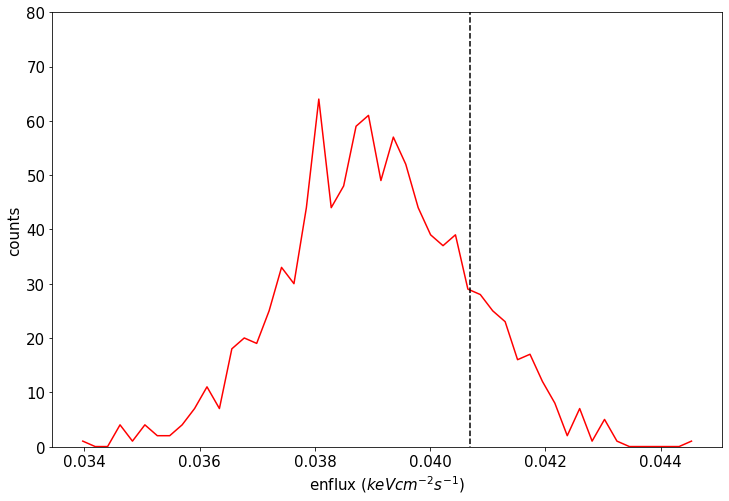

In [183]:
%matplotlib inline
plt.figure(figsize = (12,8))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(r'enflux ($keV cm^{-2} s^{-1}$)',fontsize = 15)
plt.ylabel(r'counts',fontsize = 15)
#plt.plot(ph_values,N_ph[0],'ko')
plt.plot(en_values,N_ene[0],color = 'red')

#plt.plot(ph_values,N_ph[0],'ko')
#plt.plot(ph_values,N_ph1[0])

#plt.plot(ph_values,N_ph[0],'ko')
#plt.plot(ph_values,N_ph2[0])

plt.ylim(-0.1,80)
#plt.plot([1.2,1.2],[-1,100],color = 'black', linestyle = 'dashed')
plt.savefig('enflux_distr_erosita.png')
A0 = 0.0406875
plt.plot([A0,A0],[-1,100],color = 'black', linestyle = 'dashed')
plt.show()

In [103]:
A0_1 = 0.0406875*1000*1.6e-19*1e7
print(A0_1/2.17e-11)
print(idx)

3.0
(array([], dtype=int64),)


In [6]:
%matplotlib qt

import corner
import numpy as np
ndim, nsamples = 2, beta.size
#np.random.seed(42)
A = np.array([beta,en_flux])
A = np.transpose(A)

#np.random.randn(ndim * nsamples).reshape([nsamples, ndim])
#print(samples[:,0].size)
figure = corner.corner(A,labels=[r"$\beta$", r"$A_0$($keV cm^{-2} s^{-1}$)"], title = ["photon index","Flux"], label_kwargs={"fontsize": 15}, title_kwargs={"fontsize": 15}, levels=(1-np.exp(-0.5),))
figure.figsize = (10,10)
figure.savefig('contour.pdf')

In [188]:
b1 = np.loadtxt("idx_vs_chi2",usecols = (1,))
err1 =  np.loadtxt("err_idx",usecols = (0,))
err2 =  np.loadtxt("err_idx",usecols = (1,))
chi2 = np.loadtxt("idx_vs_chi2",usecols = (0,))

err = (err2-err1)
DataOut = np.column_stack((chi2,b1,err))
print(DataOut)

np.savetxt("chi_vs_idx_vs_err",DataOut)

[[1.30606945 1.25704983 0.07822155]
 [0.89914889 1.19953981 0.07784614]
 [0.88787013 1.20652981 0.07921275]
 [1.13859605 1.23162308 0.07566456]
 [1.31250205 1.18543919 0.07269205]
 [1.12908555 1.20273754 0.07662373]
 [0.98133611 1.22443712 0.07628441]
 [1.40351699 1.2257687  0.07511957]
 [1.04756833 1.18519863 0.07687014]
 [1.26936734 1.19734537 0.07789323]
 [0.76625308 1.21844858 0.07814199]
 [1.47029072 1.20843568 0.07628015]
 [0.95451361 1.20663694 0.07510503]
 [1.1037039  1.18727064 0.07859804]
 [1.20856474 1.20121083 0.07367167]
 [1.00168021 1.19649961 0.07944055]
 [1.00223354 1.21084616 0.07586496]
 [0.75920441 1.20063976 0.07851076]
 [0.82006452 1.24430228 0.0774986 ]
 [0.98864579 1.23955481 0.07701268]]
